In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import pickle
import os
import re
import seaborn as sns
from sklearn import metrics
sns.set_style('white')
sns.set_palette('colorblind')

In [2]:
def attention_single_file(filename):
    with open(filename, 'rb') as file_:
        result = pickle.load(file_)
    return result

In [3]:
def prediction_filenames(dirname):
    return [run_prediction for run_prediction in os.listdir(dirname)
            if os.path.isfile(os.path.join(dirname, run_prediction)) and 'predictions' in run_prediction]

In [4]:
def labels_single_file(filename):
    result = pandas.read_csv(filename, sep='\t')
    return result

In [85]:
classifier = '18-08-29-18-24'
classifier2 = '18-08-18-14-19'
partition = 2
dataset = 'dev'
att_matrix = attention_single_file(
    '/home/mteruel/am/results/ukpnets/definitive/{}/attention_partition{}_ukp_{}.p'.format(classifier, partition, dataset))
echr_prediction = labels_single_file(
    '/home/mteruel/am/results/ukpnets/definitive/{}/predictions_partition{}_ukp_{}.conll'.format(classifier, partition, dataset))
echr_prediction.loc[:,'Attention Score'] = numpy.abs(numpy.concatenate(att_matrix['ukp']))
echr_prediction.loc[:, 'Correct'] = (echr_prediction.Predicted == echr_prediction['True'])

In [86]:
echr_prediction2 = labels_single_file(
    '/home/mteruel/am/results/ukpnets/definitive/{}/predictions_partition{}_ukp_{}.conll'.format(classifier2, partition, dataset))
echr_prediction.loc[:,'Noattention'] = echr_prediction2.Predicted
echr_prediction.loc[:, 'Equal'] = (echr_prediction.Predicted == echr_prediction.Noattention)

/home/mteruel/miniconda3/envs/env_am/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


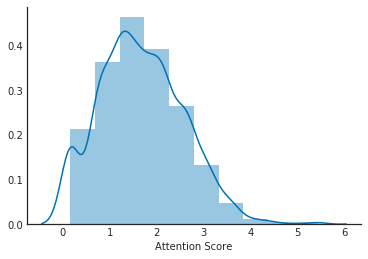

In [87]:
sns.distplot(echr_prediction['Attention Score'], bins=10)
sns.despine()

In [88]:
echr_prediction['Attention Score'].describe()

count    2291.000000
mean        1.675160
std         0.894487
min         0.156088
25%         1.025004
50%         1.621429
75%         2.231454
max         5.431878
Name: Attention Score, dtype: float64

In [89]:
echr_prediction[echr_prediction.Sentence == 34][20:45]

,Token,True,Predicted,Sentence,Attention Score,Correct,Noattention,Equal
819,with,O,O,34,0.968067,True,O,True
820,a,O,O,34,0.580411,True,O,True
821,properly,O,O,34,2.184253,True,O,True
822,reasoned,O,O,34,2.548313,True,O,True
823,decision,O,O,34,2.231454,True,O,True
824,",",O,O,34,1.252937,True,O,True
825,the,O,O,34,0.156088,True,O,True
826,Government,O,O,34,2.682102,True,O,True
827,argued,O,O,34,2.629411,True,O,True
828,that,O,O,34,1.471410,True,O,True


In [90]:
import json

In [91]:
json_words = json.dumps(
    echr_prediction[['Token', 'Attention Score', 'Sentence', 'Predicted', 'Correct']].values.tolist()[500:800]
)

In [92]:
json_words[:300]

'[["did", 1.5899932384490967, 25, "O", true], ["not", 1.6235233545303345, 25, "O", true], ["comment", 2.346489429473877, 25, "O", true], ["on", 0.9021084308624268, 25, "O", true], ["this", 1.1707147359848022, 25, "O", true], ["matter", 2.338768482208252, 25, "O", true], [".", 2.6258156299591064, 25, '

How to run D3 on Jupyter

It is still a mistery, and sometimes it does not work, but this worked https://blog.thedataincubator.com/2015/08/embedding-d3-in-an-ipython-notebook/


In [93]:
from IPython.core.display import display, HTML
from string import Template
import json

In [94]:
HTML('<script src="https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.16/d3.min.js"></script>')

In [95]:
HTML('<script src="https://d3js.org/d3-color.v1.min.js"></script>')

In [96]:
HTML('<script src="https://d3js.org/d3-interpolate.v1.min.js"></script>')

In [97]:
HTML('<script src="https://d3js.org/d3-scale-chromatic.v1.min.js"></script>')

In [98]:
HTML('<script src="textChart.js"></script>')

In [99]:
HTML("""<script>
if (d3 === undefined) {
    alert('No d3 library');
}
if (TextChart === undefined) {
    alert('No Chart library');
}
</script>""")

In [101]:
js_text_template = Template('''
var nouns = JSON.parse('$json_data');

opts = {
  lineHeight: 16,
  width: 900,
  height: 600,
  linePadding: 10,
  useColor: false,
  labelColors: {
    'B-claim': '#FF5964',
    'I-claim': '#FF5964',
    'B-premise': '#35A7FF',  // blue
    'I-premise': '#35A7FF',
    'O': '#888888'
  },
}
chart = new TextChart(nouns, opts);
chart.draw('text-container');
''')

html_template = Template('''
    <div id='text-container'></div>
    <script src="textChart.js"></script>
    <script>$js_text</script>
''')

js_text = js_text_template.substitute({
    'json_data': json_words
})

HTML(html_template.substitute({'js_text': js_text}))

In [102]:
att_words = echr_prediction[echr_prediction['Attention Score'] > 0.967].Token.unique()
attentions_big = [echr_prediction[echr_prediction.Token == x]['Attention Score'].iloc[0] for x in att_words]
att_list = [(y, x) for y, x in reversed(sorted(zip(attentions_big, att_words)))]
for att, word in att_list:
    print(int((att-min(attentions_big))*550), word)

2455 ECHR
2306 UNANIMOUSLY
2025 VIOLATION
2024 VIOLATIONS
1883 Human
1883 Hajiyev
1846 REASONED
1794 COURT
1792 ALLEGED
1768 PROCEDURE
1756 Holds
1692 Having
1658 DECISION
1653 OTHER
1644 THESE
1641 STRASBOURG
1610 Helle
1601 Hansen
1590 REASONS
1569 JUDGMENT
1537 LAW
1500 Ruiz
1496 CONVENTION
1496 ARTICLE
1489 ACCOUNT
1457 October
1454 With
1453 inadmissible
1443 re-examination
1434 Rules
1431 FOR
1429 THE
1424 explained
1419 Rights
1418 Azerbaijan
1413 re-examine
1390 Criminal
1379 admissible
1364 Russian
1362 Admissibility
1348 examined
1346 Babayev
1341 Registrar
1320 appellate
1308 Reports
1294 Besides
1290 examine
1285 ON
1283 Decisions
1263 On
1239 OF
1233 Rule
1227 Deputy
1222 Procedure
1220 Others
1216 v.
1213 exhausted
1209 Riga
1192 President
1178 LACK
1177 Furthermore
1175 judgments
1167 existence
1167 exercise
1166 Protocols
1161 impugned
1159 judgment
1153 Latvian
1152 FACTS
1144 Law
1143 violated
1137 jurisprudence
1136 extraordinary
1132 criminal
1129 Court
1127 ...
112

# Essays

In [32]:
classifier = '18-09-03-16-23'
dataset = 'dev'
att_matrix = attention_single_file(
    '/home/mteruel/am/results/ukpnets/definitive/essays/{}/attention_essays_essays_{}.p'.format(classifier, dataset))
prediction = labels_single_file(
    '/home/mteruel/am/results/ukpnets/definitive/essays/{}/predictions_essays_essays_{}.conll'.format(classifier, dataset))
prediction.loc[:,'Attention Score'] = numpy.abs(numpy.concatenate(att_matrix['essays']))
prediction.loc[:, 'Correct'] = (prediction.Predicted == prediction['True'])

/home/mteruel/miniconda3/envs/env_am/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


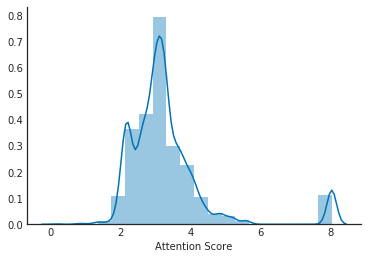

In [33]:
sns.distplot(prediction['Attention Score'], bins=20)
sns.despine()

In [34]:
prediction['Attention Score'].describe()

count    4017.000000
mean        3.321908
std         1.225046
min         0.165515
25%         2.664133
50%         3.091988
75%         3.584361
max         8.042599
Name: Attention Score, dtype: float64

In [45]:
att_words = prediction[prediction['Attention Score'] > 4].Token.unique()
attentions_big = [prediction[prediction.Token == x]['Attention Score'].iloc[0] for x in att_words]
att_list = [(y, x) for y, x in reversed(sorted(zip(attentions_big, att_words)))]
for att, word in att_list:
    print(int(att)*3, word)

24 .
15 because
15 successfully
15 ;
15 should
15 Since
15 Actually
15 Thus
15 Furthermore
15 your
15 Nevertheless
15 seriously
15 Otherwise
15 ?
15 obviously
15 actually
12 usually
12 thus
12 Consequently
12 properly
12 although
12 could
12 Nonetheless
12 Such
12 eventually
12 conclusion
12 would
12 So
12 must
12 Personally
12 Once
12 without
12 However
12 conclude
12 2010
12 According
12 Secondly
12 Undoubtedly
12 2008
12 why
12 But
12 Additionally
12 constantly
12 though
12 You
12 quite
12 according
12 always
12 promptly
12 since
12 whereas
12 discussion
12 Certainly
12 definitely
12 Olympic
12 Despite
12 during
12 drawbacks
12 wisely
12 really
12 perpetually
12 suggests
12 discussed
12 suspected
12 housework
12 negatively
12 Admittedly
12 never
12 but
12 typically
12 our
12 widely
12 very
12 such
12 Therefore
12 Nowadays
12 circumstances
12 differently
12 towards
12 painkillers
12 resulting
12 facebook
12 therefore
12 Moreover
12 up
12 Instead
12 Pharmaceutical
12 instead
12 check


In [16]:
prediction[:250]

,Token,True,Predicted,Sentence,Attention Score,Correct
0,computer,O,O,0,0.996478,True
1,has,O,O,0,0.996283,True
2,negative,O,O,0,0.998548,True
3,effects,O,O,0,0.995958,True
4,to,O,O,0,0.999049,True
5,children,O,O,0,0.994524,True
6,Nowadays,O,O,1,0.995008,True
7,",",O,O,1,0.999503,True
8,thanks,O,O,1,0.996361,True
9,to,O,O,1,0.999049,True


In [588]:
import json

In [589]:
json_words = json.dumps(
    prediction[['Token', 'Attention Score', 'Sentence', 'Predicted', 'Correct']].values.tolist()[350:800]
)

In [590]:
json_words[:300]

'[["daily", 0.010598748922348022, 16, "I-Premise", false], ["lives", 0.5938326716423035, 16, "I-Premise", false], [".", 0.9184814691543579, 16, "O", true], ["Some", 0.42985084652900696, 17, "O", true], ["people", 0.42119938135147095, 17, "O", true], ["hold", 0.5118274092674255, 17, "O", true], ["the"'

In [591]:
js_text_template = Template('''
var nouns = JSON.parse('$json_data');

opts = {
  lineHeight: 16,
  width: 950,
  height: 600,
  linePadding: 10,
  useColor: false,
  labelColors: {
    'B-Claim': '#FF5964',
    'I-Claim': '#FF5964',
    'B-Premise': '#35A7FF',  // blue
    'I-Premise': '#35A7FF',
    'O': '#888888'
  }
}
chart = new TextChart(nouns, opts);
chart.draw('essay-container');
''')

html_template = Template('''
    <div id='essay-container'></div>
    <script src="textChart.js"></script>
    <script>$js_text</script>
''')

js_text = js_text_template.substitute({
    'json_data': json_words
})

HTML(html_template.substitute({'js_text': js_text}))